# **Mining Quality Prediction Using Machine Learning and Deep Learning**

This project aims to predict the quality of mining using machine and deep learning techniques. We will explore various algorithms, preprocess the data, and analyze the results to determine the best model for our prediction task.

Mining companies can leverage the power of AI/ML in mineral sorting and exploration, autonomous drilling, safety and maintenace, and many more.

## The Business Case

The first step of this project is to understand the business case and the context which this data analysis project will be used.

A potential business case and context for the project would be a copper mining company wants to optimize their mining operations by improving the quality of their copper output. Traditional means, which is manual sampling and testing of the ore to determine the concentration of these minerals, which is time-consuming and may not be representative of the entire ore deposit. It can also be used to accurately predict the concentration of iron ore and silica in the copper ore based on various geological and mining parameters. The model would enable them to identify the areas with the highest-quality copper deposits, optimize their mining operations, and increase their profits. 

Additionally, the model could also be used to forecast future copper quality, which would aid in the company's decision-making process regarding investment and expansion.
Overall, the business case for this data analysis project is to improve mining operations and increase profits by accurately predicting the concentration of iron ore and silica in copper ore using machine learning and deep learning.

## Data Exploration

In [4]:
# Import necessary libraries and data sets
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile
from jupyterthemes import jtplot

# setting notebook style to monokai; for better visibility of x and y axis
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

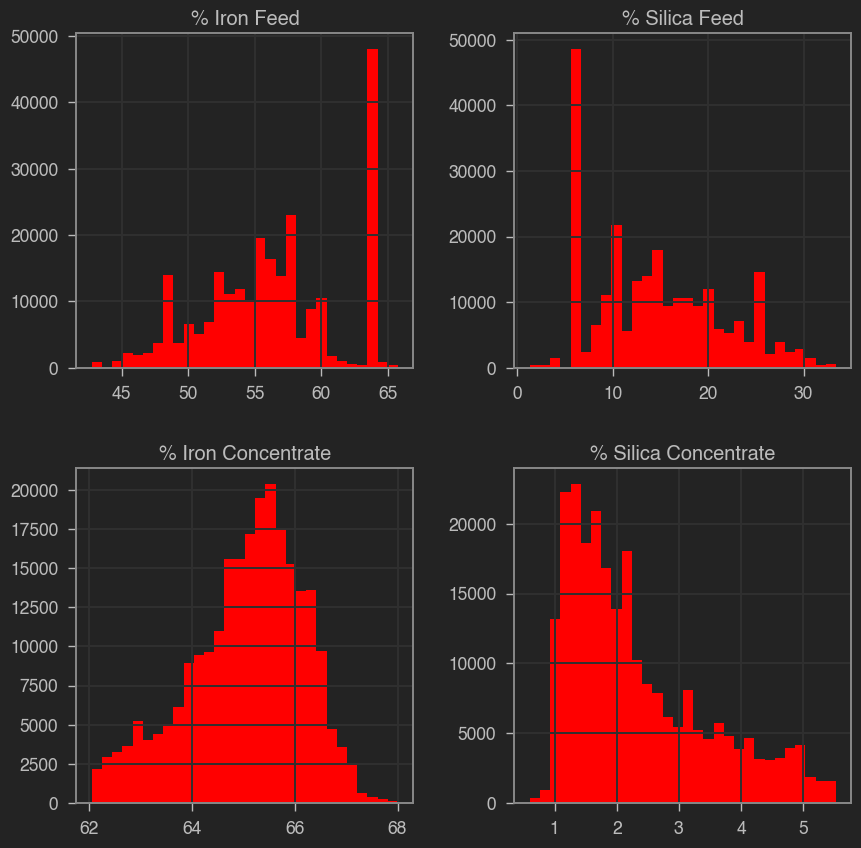

In [29]:
# import mine data for exploration
mining_df = pd.read_csv('mining_data.csv')
# check the data types of each column
mining_df.dtypes, mining_df.isnull().sum()
mining_df
mining_df.dtypes
# check the number of null elements in the dataframe
mining_df.isnull().sum()
# Statistic summary of the dataframe
mining_df.describe()

# Average % Silica concentrate = 2.32%
# Maximum % Iron Concentrate = 68%

# perform data visualizations
# Display histogram to show relationship
mining_df[['% Iron Feed', '% Silica Feed', '% Iron Concentrate', '% Silica Concentrate']].hist(bins=30, figsize=(10, 10), color='red')
plt.show()

From the plot above we can infer that there is a relationship between iron feed and silica feed.
Also, a relationship between silica concentrate and iron concentrate.

<Axes: >

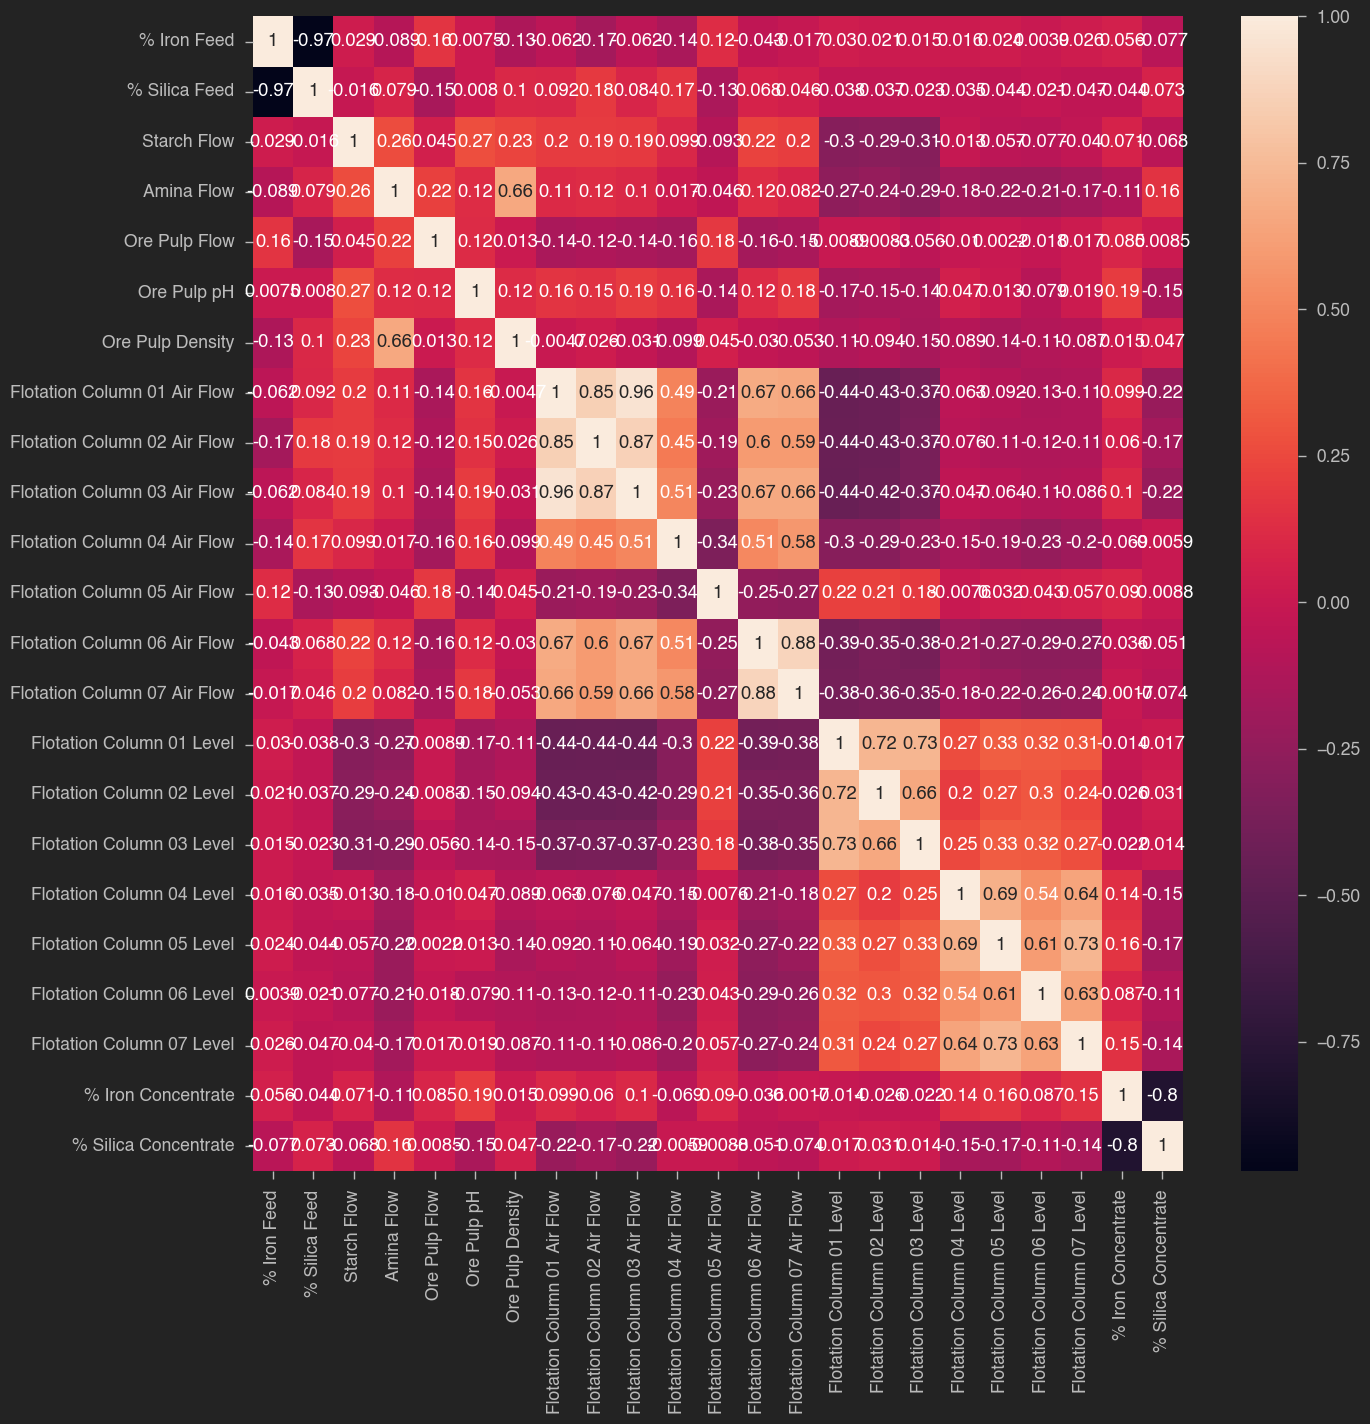

In [19]:
# obtain correlation matrix
mining_df.corr()
plt.figure(figsize = (15, 15))
sns.heatmap(mining_df.corr(), annot = True)

There is an almost perfectly inverse correlation between iron and silica feed, with a coefficient of -0.97. And a coefficient of -0.8 for Iron concentrate and Silica concentrate, indicates and inverse relationship.



<Axes: xlabel='% Iron Feed', ylabel='% Silica Feed'>

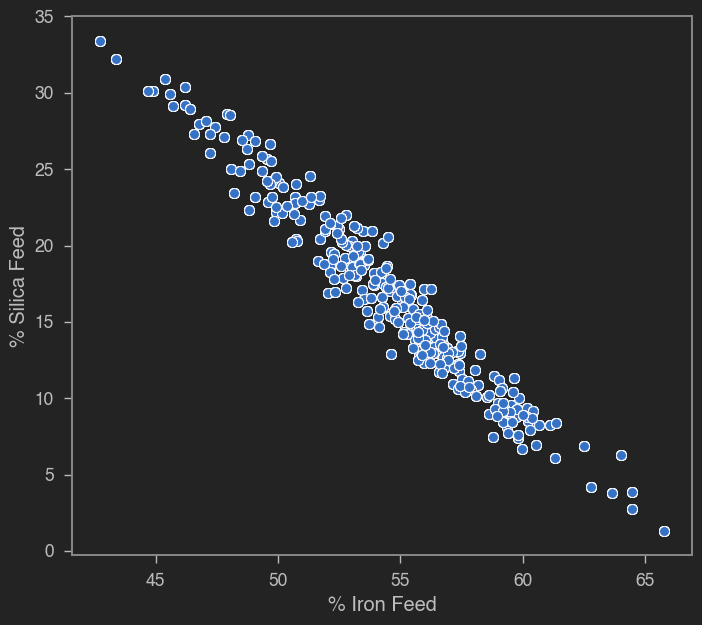

In [27]:
# Display scatterplot to show relationships
# correlation between iron and silica feed
sns.scatterplot(x='% Iron Feed', y='% Silica Feed', data=mining_df)

The above scatterplot almost follows a straight line, which shows the near perfect inverse relationship between the iron and silica feed.
The higher the percenrage of silica feed the lower the percentage of iron feed in the mining process.

<Axes: xlabel='% Silica Concentrate', ylabel='% Iron Concentrate'>

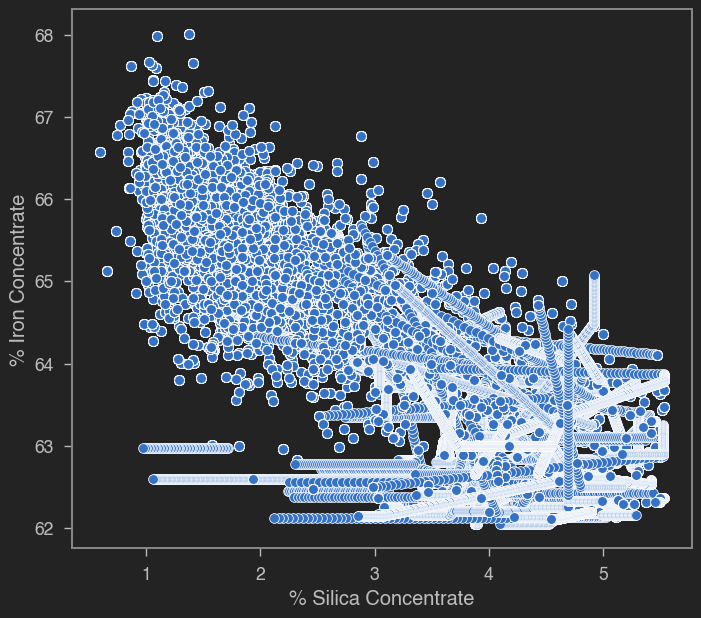

In [28]:
# percentage of iron and silica concentrate are also inversely correlated
sns.scatterplot(x='% Silica Concentrate', y='% Iron Concentrate', data=mining_df)

The scatterplot also shows this inverse relatonship that exists between percentages of iron ore and silica in the copper mining process.

## Prepare Data for Model Training

Next, we are preparing the mining dataset for model training by first separating the input and output data.

We drop the column for "% Silica Concentrate" from the input data and assign it to a new dataframe called "df_iron", while the target column is assigned to a new variable called "df_iron_target". We then check the shapes of the input and output data to confirm they match.

In [35]:
# seperate inputs and output data
df_iron = mining_df.drop(columns = '% Silica Concentrate')
df_iron_target = mining_df['% Silica Concentrate']

# check sample column input for model
df_iron.shape
df_iron_target.shape

(245700,)

Next, we convert the new columns into numpy arrays and reshape the target variable to (-1,1) so that it has only one column.

We then scale the input and output data using StandardScaler() from the scikit-learn library to ensure that the data is on the same scale and no one feature dominates the others.

In [39]:
# convert new columns into numpy array
df_iron = np.array(df_iron)
df_iron_target = np.array(df_iron_target)

# reshape the array
df_iron_target = df_iron_target.reshape(-1,1)
df_iron_target.shape

#scaling the data for model
# Import necessary libraries
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_x = StandardScaler()
X = scaler_x.fit_transform(df_iron)

scaler_y = StandardScaler()
y = scaler_y.fit_transform(df_iron_target)

Finally, we split the data into a training set and a test set using the train_test_split() method from scikit-learn.

This allows us to train our model on the training set and then evaluate its performance on the test set to ensure that it can generalize well to new, unseen data.

In [36]:
# split the data to test and train sets
# Import necessary libraries
from sklearn.model_selection import train_test_split

# divide data into 20% test and 80% train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Overall, the steps taken here help us to prepare the data for model training by cleaning it, transforming it into an appropriate format, and splitting it into a training set and a test set.

This ensures that we have high-quality data that is ready to be used for model training and evaluation.

Next, the code below verifies that the data has been successfully split into training and testing sets by printing the shapes of the arrays. The code also checks the distribution of the target variable in both the training and testing sets.

In [37]:
# verify successful split
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (196560, 22)
X_test shape: (49140, 22)
y_train shape: (196560, 1)
y_test shape: (49140, 1)


The histograms and density plots of the target variable in the training and testing sets are plotted to visually check if the data is normally distributed or skewed.

A normal distribution of the target variable in both sets is preferred for regression models. If the data is not normally distributed, then transformations may need to be performed on the target variable.

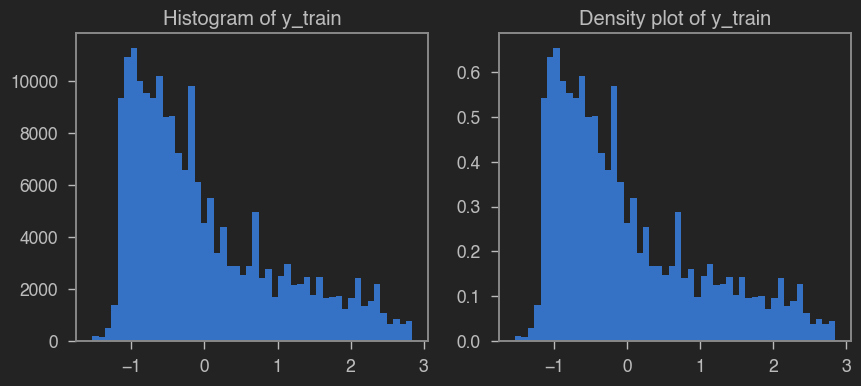

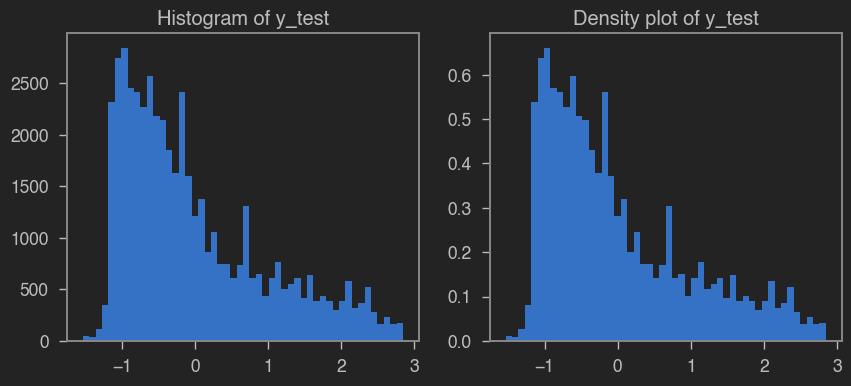

In [38]:
# check distribution of target variable in training and testing sets
# Plot histogram and density plot of the target variable in the training set
fig, axs = plt.subplots(ncols=2, figsize=(10, 4))
axs[0].hist(y_train, bins=50)
axs[0].set_title('Histogram of y_train')
axs[1].hist(y_train, bins=50, density=True)
axs[1].set_title('Density plot of y_train')

# Plot histogram and density plot of the target variable in the testing set
fig, axs = plt.subplots(ncols=2, figsize=(10, 4))
axs[0].hist(y_test, bins=50)
axs[0].set_title('Histogram of y_test')
axs[1].hist(y_test, bins=50, density=True)
axs[1].set_title('Density plot of y_test')

plt.show()

Overall, these steps help ensure that the data is properly split and that the target variable is suitable for the regression model.

## Machine Learning Models

Next, we will explore linear regresion, decision tree and random forest models. 

We will import the necessary libraries, initialize the models, fit the models on the training data, and evaluate the models' accuracy on the test data.

### Linear Regression Model

We will start with a simple linear regression model. We will import the necessary libraries, initialize the model, fit the model on the training data, and evaluate the model's accuracy on the test data.

The code initializes and trains a Linear Regression model using the LinearRegression() class from the sklearn.linear_model library. The trained model is then used to predict on the test data, and the accuracy is calculated using the score() method.

In [41]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize a Linear Regression model
linear_reg_model = LinearRegression()

# Fit the model on training data
linear_reg_model.fit(X_train, y_train)

# Predict on test data and calculate accuracy
accuracy_linear_reg = linear_reg_model.score(X_test, y_test)
accuracy_linear_reg

0.6810703114796606

This code imports the necessary libraries for linear regression, which include the LinearRegression class from sklearn.linear_model and the mean_squared_error and r2_score functions from sklearn.metrics. It then initializes a Linear Regression model by creating an instance of the LinearRegression class and assigns it to the variable linear_reg_model.

The model is then trained on the training data using the fit method with the training features and target variables X_train and y_train respectively.

### Decision Tree Model

The 'DecisionTreeRegressor' is a supervised learning algorithm used for regression tasks.

In [42]:
# Import necessary libraries
from sklearn.tree import DecisionTreeRegressor

# Initialize a Decision Tree Regression model
decision_tree_model = DecisionTreeRegressor()

# Fit the model on training data
decision_tree_model.fit(X_train, y_train)

# Predict on test data and calculate accuracy
accuracy_decision_tree = decision_tree_model.score(X_test, y_test)
accuracy_decision_tree

0.9833293864726437

It works by splitting the data into smaller subsets based on the value of a feature, until the data in each subset is as homogeneous as possible with respect to the target variable. The process is recursive and stops when a stopping criterion is met, such as reaching the maximum depth of the tree or having a minimum number of samples in each leaf node.

The 'score()' method returns the coefficient of determination, R^2 of the prediction, which is a measure of the goodness of fit of the model. The value of R^2 ranges from 0 to 1, with 1 being a perfect fit.

### Random Forrest Model

Random Forest Regressor is an ensemble learning method that creates a large number of decision trees and combines their predictions to produce the final output. The n_estimators parameter specifies the number of decision trees to be created, and max_depth parameter limits the depth of each decision tree to 10. These values can be adjusted based on the complexity of the data and the desired level of accuracy.

The fit() method is used to train the model on the training data, and the score() method is used to evaluate the performance of the model on the test data. The output of the score() method represents the coefficient of determination, also known as R-squared, which measures the proportion of the variance in the target variable that is predictable from the input variables. The higher the R-squared value, the better the model fits the data.

In [45]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor

# Initialize a Random Forest Regressor Model with n_estimators = 100 and max_depth of 10
RandomForest_model = RandomForestRegressor(n_estimators=100, max_depth=10)

# Fit the model on training data
RandomForest_model.fit(X_train, y_train.ravel())

# Predict on test data and calculate accuracy
accuracy_RandomForest = RandomForest_model.score(X_test, y_test)
accuracy_RandomForest

0.8907878843941146

To train a Random Forest Regressor Model, we first import the necessary libraries. Then we initialize a Random Forest Regressor Model with n_estimators = 100 and max_depth of 10.

Next, we fit the model on the training data using the 'fit()' method. Finally, we predict on test data and calculate the accuracy of the model using the 'score()' method.

## Artificial Nueral Network and Deep Learning Model

This code will train an artificial neural network (ANN) model with 10 epochs and 22 input features.

The model has several hidden layers with various sizes, using the rectified linear unit (ReLU) activation function and dropout regularization to prevent overfitting. 

The output layer uses a linear activation function and the mean squared error (MSE) loss function with the Adam optimizer. The model's accuracy is evaluated using the test set.

In [48]:
# Import necessary libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

# Define optimizer with specific parameters
optimizer = Adam(learning_rate=0.001, beta_1 = 0.9, beta_2 = 0.999, epsilon = 1e-07, amsgrad = False)

# Create sequential model object
ANN_model = keras.Sequential()

# Add input layer
ANN_model.add(Dense(250, input_dim = 22, kernel_initializer='normal',activation='relu'))

# Add hidden layer
ANN_model.add(Dense(500,activation = 'relu'))

# Add dropout layer to prevent overfitting
ANN_model.add(Dropout(0.1))

# Add more layers to model
ANN_model.add(Dense(1000, activation = 'relu'))
ANN_model.add(Dropout(0.1))
ANN_model.add(Dense(1000, activation = 'relu'))
ANN_model.add(Dropout(0.1))
ANN_model.add(Dense(500, activation = 'relu'))
ANN_model.add(Dropout(0.1))
ANN_model.add(Dense(250, activation = 'relu'))
ANN_model.add(Dropout(0.1))
ANN_model.add(Dense(250, activation = 'relu'))
ANN_model.add(Dropout(0.1))

# Add output layer and linear function
ANN_model.add(Dense(1, activation = 'linear'))

# Compile model woth MSE loss function and adam optimizer
ANN_model.compile(loss = 'mse', optimizer = 'adam')

# Print summary
ANN_model.summary()

2023-04-07 17:17:41.186080: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 250)               5750      
                                                                 
 dense_1 (Dense)             (None, 500)               125500    
                                                                 
 dropout (Dropout)           (None, 500)               0         
                                                                 
 dense_2 (Dense)             (None, 1000)              501000    
                                                                 
 dropout_1 (Dropout)         (None, 1000)              0         
                                                                 
 dense_3 (Dense)             (None, 1000)              1001000   
                                                                 
 dropout_2 (Dropout)         (None, 1000)              0

This output is from the summary of the artificial neural network (ANN) model that has been created using TensorFlow library.

The summary provides a detailed overview of the architecture of the model including the type of layers used, the output shape of each layer, and the number of parameters used in the model.

In this specific model, we have used a sequential model object and added different types of layers such as dense, dropout, and activation.

The model has a total of 2,322,001 parameters, which can be trained to optimize the model's predictions. The trainable params are the parameters that can be updated during the training process.

This summary provides a good insight into the architecture and complexity of the model, which can help us to understand how the model is making predictions and how we can optimize it further.

In [49]:
# train model
history = ANN_model.fit(X_train, y_train, epochs = 10, validation_split = 0.2)
result = ANN_model.evaluate(X_test, y_test)
accuracy_ANN = 1 - result
print("Accuracy : {}".format(accuracy_ANN))

Epoch 1/10
4914/4914 [==============================] - 103s 21ms/step - loss: 0.2139 - val_loss: 0.1592
Epoch 2/10
4914/4914 [==============================] - 108s 22ms/step - loss: 0.1450 - val_loss: 0.1344
Epoch 3/10
4914/4914 [==============================] - 110s 22ms/step - loss: 0.1214 - val_loss: 0.1155
Epoch 4/10
4914/4914 [==============================] - 110s 22ms/step - loss: 0.1097 - val_loss: 0.0898
Epoch 5/10
4914/4914 [==============================] - 111s 23ms/step - loss: 0.1006 - val_loss: 0.1113
Epoch 6/10
4914/4914 [==============================] - 110s 22ms/step - loss: 0.0970 - val_loss: 0.0795
Epoch 7/10
4914/4914 [==============================] - 112s 23ms/step - loss: 0.0886 - val_loss: 0.0780
Epoch 8/10
4914/4914 [==============================] - 131s 27ms/step - loss: 0.0877 - val_loss: 0.0809
Epoch 9/10
4914/4914 [==============================] - 118s 24ms/step - loss: 0.0866 - val_loss: 0.0789
Epoch 10/10
1536/1536 [==============================] 

The output shows the training process of a neural network model with 10 epochs. The model was trained on a training set of 4914 data points and validated on a validation set, which is a subset of the training set with 20% of the data.

For each epoch, the training and validation losses (measured by the mean squared error) are shown. The training loss starts at 0.2139 and decreases as the model is trained. The validation loss is shown for each epoch to monitor for overfitting, where the model may perform well on the training set but not generalize well to new data.

After the training process is completed, the model is evaluated on a test set of 1536 data points, and the mean squared error (loss) is shown. The accuracy is then calculated as 1 minus the loss. The model has an accuracy of 92.6% on the test set.

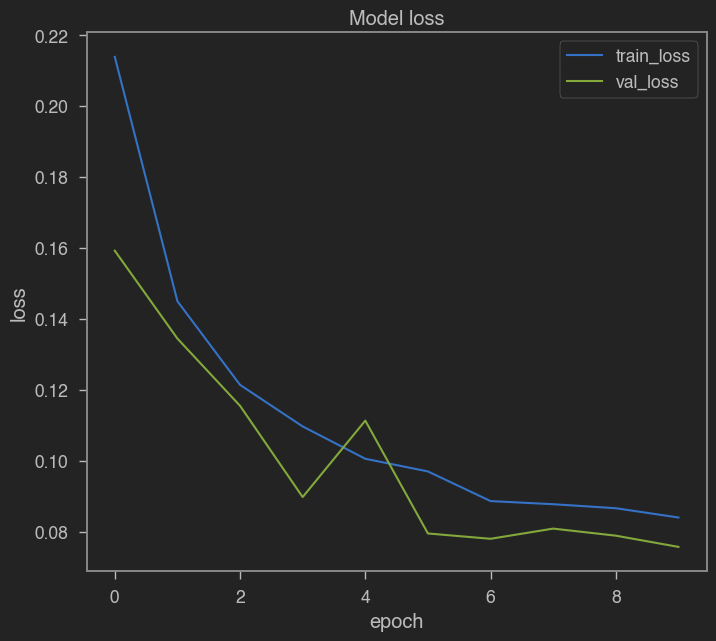

In [50]:
# plot the training and validation loss of a model across epochs
history.history.keys()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'], loc = 'upper right')
plt.show()

In the code block above, the 'history.history.keys()' returns the keys of the dictionary history.history, which contains the training history of the model.
In this case, the dictionary contains two keys: 'loss' and 'val_loss'.

'loss' represents the training loss of the model, and 'val_loss' represents the validation loss of the model.

The plot above shows the training loss and validation loss of the model, respectively.
The y and x-axis labels the loss and epochs, respectively.

We can see formt he plot that th error reduces as the the number of epochs increases

## Comparing Models and Calculating Regression KPIs

From the accuracy of the model results above, we see that the desicion tree model outperforms the other models

In [63]:
# import necessary libraries
from tabulate import tabulate

table = [["Linear Regression", accuracy_linear_reg],
         ["Decision Tree", accuracy_decision_tree],
         ["Random Forest", accuracy_RandomForest],
         ["ANN", accuracy_ANN]]

print(tabulate(table, headers=["Model", "Accuracy"], tablefmt="grid"))

+-------------------+------------+
| Model             |   Accuracy |
+===================+============+
| Linear Regression |   0.68107  |
+-------------------+------------+
| Decision Tree     |   0.983329 |
+-------------------+------------+
| Random Forest     |   0.890788 |
+-------------------+------------+
| ANN               |   0.926251 |
+-------------------+------------+


Next we will use the decision tree model to make our prediction.

The code block below uses the decision tree model to make predictions on the test dataset (X_test) and then plots the predicted values against the actual values (y_test).

The plot has the predicted values on the x-axis and the actual values on the y-axis.

Text(0, 0.5, 'True Values')

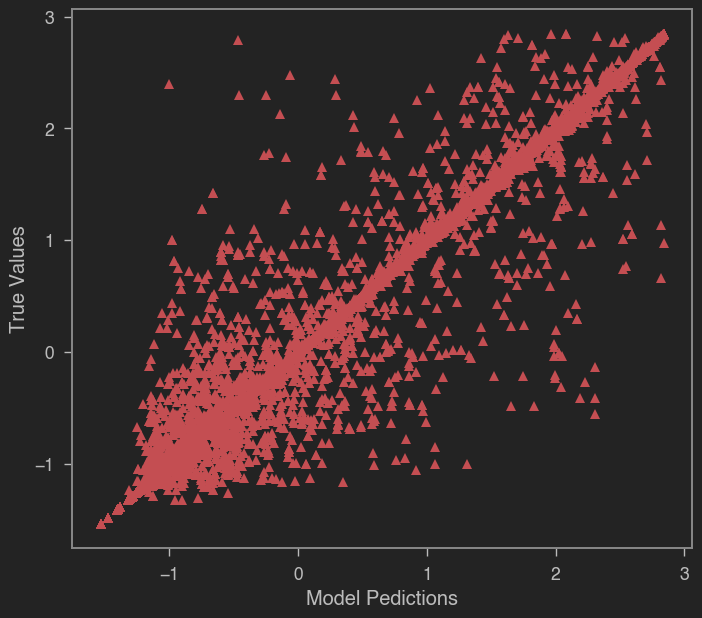

In [54]:
y_predict = decision_tree_model.predict(X_test)
plt.plot(y_predict, y_test, '^', color = 'r')
plt.xlabel('Model Pedictions')
plt.ylabel('True Values')

From the plot above we can visually see that we can draw a a 45 degree line of best fit with some outliers. A 45 degree line indicates that both predictions are the same or similar.

Next we will transform the plot to make the scale of our earlier plot showing the mineral concentrations and feed.

Text(0, 0.5, 'True Values')

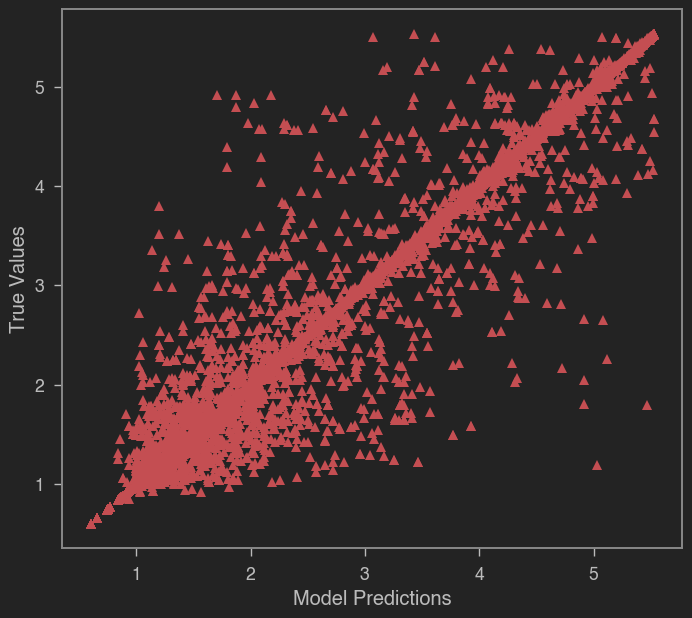

In [64]:
y_predict_orig = scaler_y.inverse_transform(y_predict.reshape(-1, 1))
y_test_orig = scaler_y.inverse_transform(y_test.reshape(-1, 1))
plt.plot(y_test_orig, y_predict_orig, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')

### Calculate KPIs

Below are the evaluation metrics we are going to use for the regression model.

In [67]:
# import necessary libraries
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

# perform model evaluation and print results
k = X_test.shape[1]
n = len(X_test)
RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

table = [["RMSE", RMSE],
         ["MSE", MSE],
         ["MAE", MAE],
         ["R2", r2],
         ["Adjusted R2", adj_r2]]

headers = ["Metric", "Value"]

print(tabulate(table, headers=headers, tablefmt="orgtbl"))

| Metric      |     Value |
|-------------+-----------|
| RMSE        | 0.145     |
| MSE         | 0.0208876 |
| MAE         | 0.0211142 |
| R2          | 0.983329  |
| Adjusted R2 | 0.983322  |


RMSE (Root Mean Squared Error) measures the square root of the average of the squared differences between the predicted values and the actual values. It gives an idea of how much the predictions deviate from the actual values.

MSE (Mean Squared Error) is the mean of the squared differences between the predicted values and the actual values. It measures the average of the squared errors, and it is useful to compare different models.

MAE (Mean Absolute Error) is the mean of the absolute differences between the predicted values and the actual values. It measures the average of the absolute errors.

R2 (R-Squared) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model. It takes a value between 0 and 1.

Adjusted R2 is a modified version of R2 that adjusts for the number of independent variables in the model. It is used to determine if adding another variable to the model will increase the explanatory power of the model.

## Conclusion

The values suggest that the model has a good performance in predicting the target variable.

RMSE (Root Mean Squared Error) is a measure of the difference between the predicted values and the actual values. In this case, the RMSE is relatively small (0.145), which indicates that the model's predictions are relatively close to the actual values.

MSE (Mean Squared Error) is another measure of the difference between the predicted and actual values. The MSE value (0.0209) is relatively small, which means that the model's predictions are relatively accurate.

MAE (Mean Absolute Error) is a third measure of the difference between the predicted and actual values. The MAE value (0.0211) is also relatively small, indicating that the model's predictions are relatively close to the actual values.

R2 (R-Squared) is a measure of how well the model fits the data. The R2 value (0.983) is relatively high, which indicates that the model explains a large portion of the variance in the target variable.

Adjusted R2 is a modified version of R2 that takes into account the number of predictors in the model. The adjusted R2 value (0.983) is almost the same as R2, indicating that the model is not overfitting the data.